<a href="https://colab.research.google.com/github/AfeesAshraf/Guvi-task-4/blob/main/Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [37]:
df1=pd.read_csv("/content/drive/MyDrive/college_1.csv")
df2=pd.read_csv("/content/drive/MyDrive/college_2.csv")
df= pd.concat(objs=[df1,df2], ignore_index=True)
df["Name"]=df["Name"].str.title()
df["Name"]=df["Name"].str.strip()

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [39]:
# Split the data into categories based on the codekata score
exceeded_expectations = df[df['CodeKata Score'] > 15000]
reached_expectations = df[(df['CodeKata Score'] > 10000) & (df['CodeKata Score'] <= 15000)]
needs_improvement = df[(df['CodeKata Score'] > 7000) & (df['CodeKata Score'] <= 10000)]
unsatisfactory = df[df['CodeKata Score'] <= 7000]

# Save each category to a separate CSV file
exceeded_expectations.to_csv('Exceeded_expectations.csv', index=False)
reached_expectations.to_csv('Reached_expectations.csv', index=False)
needs_improvement.to_csv('Needs_Improvement.csv', index=False)
unsatisfactory.to_csv('Unsatisfactory.csv', index=False)


###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [40]:
# Calculate the average of previous week geekions and this week's codekata score
prev_week_geekions_avg = df['Previous Geekions'].mean()
this_week_geekions_avg = df['CodeKata Score'].mean()

# Print the results
print('Average of previous week geekions:', prev_week_geekions_avg)
print('Average of this week codekata score:', this_week_geekions_avg)

Average of previous week geekions: 3842.3529411764707
Average of this week codekata score: 4051.764705882353


###### No of students participated 

In [42]:
df = df.dropna(subset=['CodeKata Score'])

# Select only rows where the codekata score is greater than zero
df1 = df.query('`CodeKata Score` > 0')

# Get the number of rows in the dataframe, which is equal to the number of students who participated
num_students = len(df1)

# Print the result
print('Number of students who participated:', num_students)

Number of students who participated: 112


###### #Average completion of python course or my_sql or python english or computational thinking

In [44]:
# Calculate the average completion percentage for a specific course
python_completion_avg = df['python'].mean()
mysql_completion_avg = df['mysql'].mean()
python_english_completion_avg = df['python_en'].mean()
comp_thinking_completion_avg = df['computational_thinking'].mean()

# Print the results
print('Average completion of Python course:', python_completion_avg)
print('Average completion of MySQL course:', mysql_completion_avg)
print('Average completion of Python for English Speakers course:', python_english_completion_avg)
print('Average completion of Computational Thinking course:', comp_thinking_completion_avg)


Average completion of Python course: 54.35294117647059
Average completion of MySQL course: 23.5
Average completion of Python for English Speakers course: 29.65714285714286
Average completion of Computational Thinking course: 2.2


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [45]:
# Sort the data by codekata score in descending order
sorted_df = df.sort_values(by=['CodeKata Score'], ascending=False)

# Get the top three performers
top_performers = sorted_df.head(3)

# Print the top performers
print('Top performers:')
print(top_performers)


Top performers:
          Name  python  mysql  Previous Geekions  CodeKata Score  \
0    A.Dharani    82.0   20.0              24500           24500   
1   V.Jeevitha    82.0   20.0              21740           21740   
2  Hemavathi.R   100.0  100.0              19680           19680   

                         Department  Rising  python_en  computational_thinking  
0  Computer Science and Engineering       0        NaN                     NaN  
1  Computer Science and Engineering       0        NaN                     NaN  
2  Computer Science and Engineering       0        NaN                     NaN  


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [47]:
# Sort the data by Geekions in descending order
sorted_df = df.sort_values(by=['Previous Geekions'], ascending=False)

# Get the top 3 performers
top_performers = sorted_df.head(3)

# Print the top performers
print('Top performers by Geekions:')
print(top_performers)

Top performers by Geekions:
          Name  python  mysql  Previous Geekions  CodeKata Score  \
0    A.Dharani    82.0   20.0              24500           24500   
1   V.Jeevitha    82.0   20.0              21740           21740   
2  Hemavathi.R   100.0  100.0              19680           19680   

                         Department  Rising  python_en  computational_thinking  
0  Computer Science and Engineering       0        NaN                     NaN  
1  Computer Science and Engineering       0        NaN                     NaN  
2  Computer Science and Engineering       0        NaN                     NaN  


###### Department wise codekata performence (pie chart)

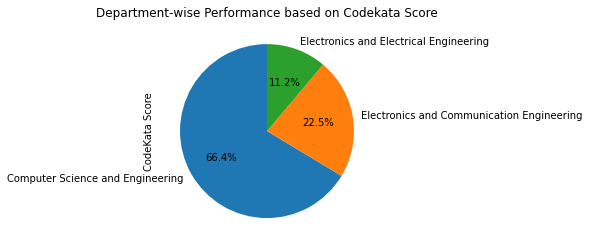

In [49]:
# Calculate the total codekata score by department
dept_totals = df.groupby('Department')['CodeKata Score'].sum()

# Plot a pie chart of the department-wise performance
dept_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Department-wise Performance based on Codekata Score')

# Display the chart
plt.show()


###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

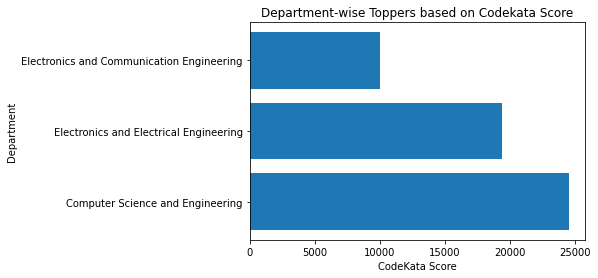

In [50]:
# Get the top performer for each department
top_performers = df.groupby('Department').apply(lambda x: x.nlargest(1, 'CodeKata Score')).reset_index(drop=True)

# Sort the data by codekata score in descending order
sorted_df = top_performers.sort_values(by=['CodeKata Score'], ascending=False)

# Plot a horizontal bar graph of the department-wise toppers
plt.barh(sorted_df['Department'], sorted_df['CodeKata Score'])

# Add a title and labels to the chart
plt.title('Department-wise Toppers based on Codekata Score')
plt.xlabel('CodeKata Score')
plt.ylabel('Department')

# Display the chart
plt.show()

